In [29]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
with h5py.File('/work/hmzhao/irregular-lc/roman-0.h5') as inp:
    X_random = inp['X_random'][...]
    X_even = inp['X_even'][...]
    Y = inp['Y'][...]

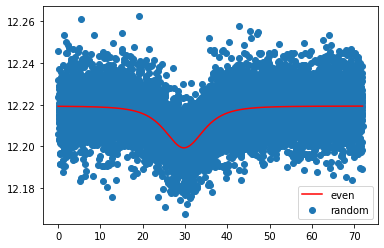

[ 2.98030328e+01  4.52880627e+00 -1.42151418e+00  5.05972249e-03
  2.68180693e-04  4.07089173e-01  2.61747110e+02  1.22387837e-01]


In [37]:
num = 396
plt.plot(X_even[num][:, 0], X_even[num][:, 1], color='red')
plt.scatter(X_random[num][:, 0], X_random[num][:, 1])
plt.legend(['even', 'random'])
plt.show()
print(Y[num])
# plt.plot(X[num][:, 0], X[num][:, 1])
# plt.errorbar(X[num][:, 0], X[num][:, 1], yerr = X[num][:, 2])